 we explore the concept of Two-Way Quantum Communication (2WQC) using PennyLane and visualize the joint measurement results using Plotly. Quantum communication involves the transfer of quantum states between parties, which is essential for various quantum information processing tasks.

The quantum circuit begins with the preparation of a quantum state $\rho$. In our example, Alice prepares a superposition state using a Hadamard gate:

$\rightarrow \text{Hadamard gate} \rightarrow |\psi\rangle = \frac{1}{\sqrt{2}}(|0\rangle + |1\rangle)
\$

The function prepare\_state\_circuit()} sets up a PennyLane quantum node to execute this circuit.


Bob receives the state $\rho$ prepared by Alice and conjugates it to prepare $\rho^*$. Conjugating a quantum state involves applying the adjoint (inverse) of the original state preparation circuit:

 $\rightarrow \text{Adjoint of } \rho \rightarrow \rho^*
\$

Here, the function conjugate\_state() defines a new quantum node that executes the adjoint operation on $\rho$.



After preparing $\rho$ and $\rho^*$, Alice and Bob perform a joint measurement on the composite system $\rho \otimes \rho^*$. This joint measurement yields probabilities for different measurement outcomes, corresponding to the states $\{|00\rangle, |01\rangle, |10\rangle, |11\rangle\}$:

 $\rightarrow \text{Probs}(|00\rangle, |01\rangle, |10\rangle, |11\rangle)
\$

The function joint\_measurement() sets up a quantum node to compute these probabilities using PennyLane.




The integration of conjugate states into Two-Way Quantum Communication (2WQC) represents a significant advancement in quantum information processing. In 2WQC scenarios, Alice and Bob initially share a quantum state $\rho$ through entanglement or a quantum channel. To harness the full potential of joint measurements on $\rho \otimes \rho^*$, the complex conjugate state $\rho^*$ must be prepared. This preparation involves constructing a circuit that mirrors the operations of the original state preparation circuit, although in a reversed manner. This capability enables Alice and Bob to independently prepare $\rho^*$ using their respective quantum resources.

The distribution of entangled pairs, essential for conjugate state measurements, uses the foundational quantum communication protocols. Efficient entanglement distribution ensures that Alice and Bob have synchronized access to $\rho$ and $\rho^*$ when needed. This synchronization is crucial for maximizing the benefits of joint measurements, enhancing learning efficiency, and enabling applications such as Quantum Key Distribution (QKD), Quantum Teleportation, and Dense Coding.

The exponential improvement in learning efficiency afforded by joint measurements on $\rho \otimes \rho^*$ offers numerous practical advantages. For instance, in QKD, the enhanced security arises from precise eavesdropping detection and efficient error correction. Similarly, in quantum teleportation, accurate state reconstruction and resource optimization are achieved, while dense coding benefits from increased information capacity.

The implementation of conjugate state measurements in 2WQC demands careful consideration of quantum memory requirements, noise mitigation strategies, and reliable classical communication for synchronization. Experimental validation in quantum communication testbeds will be crucial to assess the feasibility and performance of these advancements in real-world applications.


further discussions
how to integrate conjugate states into 2WQC as a significant advancement in quantum information processing.
 the preparation of $\rho^*$ through the construction of a reversed circuit based on the original state preparation of $\rho$.
Highlighting the role of entangled pairs in facilitating conjugate state measurements and ensuring synchronized access to $\rho$ and $\rho^*$.
 the practical benefits in QKD, quantum teleportation, and dense coding enabled by joint measurements on $\rho \otimes \rho^*$.
need to Address technical considerations such as resource management, noise mitigation, and classical communication for synchronization.

the implementation of conjugate states $\rho$ and $\rho^*$ can be expressed through the following equation


\begin{align}
    \rho \otimes \rho^* &= (\mathcal{U} \rho \mathcal{U}^\dagger) \otimes (\mathcal{U} \rho^* \mathcal{U}^\dagger) \\
    &= (\mathcal{U} \otimes \mathcal{U}) (\rho \otimes \rho^*) (\mathcal{U}^\dagger \otimes \mathcal{U}^\dagger),
\end{align}

\begin{align*}
    \text{$\rho$ and $\rho^*$} & \text{: Quantum states prepared by Alice and Bob, respectively.} \\
    \mathcal{U} & \text{: Unitary operation corresponding to the state preparation circuit.} \\
    \mathcal{U}^\dagger & \text{: Adjoint (inverse) of $\mathcal{U}$, enabling the preparation of $\rho^*$.} \\
    \otimes & \text{: Tensor product operation, representing joint measurements on the combined state.}
\end{align*}


This equation is to show how joint measurements on the composite state $\rho \otimes \rho^*$ leverage the conjugate preparation of states to enhance learning efficiency in various quantum communication tasks such as Quantum Key Distribution (QKD), Quantum Teleportation, and Dense Coding. The implementation of $\mathcal{U}$ and $\mathcal{U}^\dagger$ is important for achieving synchronization between Alice and Bob in 2WQC protocols.

In [ ]:
!pip install pennylane

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 12.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.0/51.0 kB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.1/19.1 MB 11.9 MB/s eta 0:00:00


In [ ]:
import pennylane as qml
from pennylane import numpy as np

# Define the quantum circuit for state preparation (ρ)
def prepare_state_circuit():
    dev = qml.device('default.qubit', wires=1)

    @qml.qnode(dev)
    def circuit_rho():
        qml.Hadamard(wires=0)  # Apply Hadamard gate to prepare a superposition state
        return qml.state()

    return circuit_rho

# Function to conjugate the state preparation operation
def conjugate_state(state_prep):
    @qml.qnode(state_prep.device)
    def circuit_rho_bar():
        state_prep()
        qml.adjoint(state_prep)  # Apply the adjoint (inverse) of the state preparation circuit
        return qml.state()

    return circuit_rho_bar

# Function to perform joint measurement on ρ ⊗ ρ*
def joint_measurement(qc_rho, qc_rho_bar):
    dev = qml.device('default.qubit', wires=2)

    @qml.qnode(dev)
    def joint_measurement_circuit():
        qc_rho()  # Evaluate the circuit for state ρ
        qc_rho_bar()  # Evaluate the conjugate circuit for state ρ*
        return qml.probs(wires=[0, 1])  # Perform joint measurement

    return joint_measurement_circuit

# Example usage:
if __name__ == '__main__':
    # Alice prepares the state ρ
    circuit_rho = prepare_state_circuit()

    # Bob conjugates the state preparation to prepare ρ*
    circuit_rho_bar = conjugate_state(circuit_rho)

    # Alice and Bob perform joint measurement on ρ ⊗ ρ*
    joint_measurement_circuit = joint_measurement(circuit_rho, circuit_rho_bar)

    # Simulate the joint measurement
    result = joint_measurement_circuit()

    print("Joint measurement results:", result)


Joint measurement results: [1. 0. 0. 0.]


In [ ]:
import pennylane as qml
from pennylane import numpy as np

# Define the quantum circuit for state preparation (ρ)
def prepare_state_circuit():
    dev = qml.device('default.qubit', wires=1)

    @qml.qnode(dev)
    def circuit_rho():
        qml.Hadamard(wires=0)  # Apply Hadamard gate to prepare a superposition state
        return qml.state()

    return circuit_rho

# Function to conjugate the state preparation operation
def conjugate_state(state_prep):
    @qml.qnode(state_prep.device)
    def circuit_rho_bar():
        state_prep()
        qml.adjoint(state_prep)  # Apply the adjoint (inverse) of the state preparation circuit
        return qml.state()

    return circuit_rho_bar

# Function to perform joint measurement on ρ ⊗ ρ*
def joint_measurement(qc_rho, qc_rho_bar):
    dev = qml.device('default.qubit', wires=2)

    @qml.qnode(dev)
    def joint_measurement_circuit():
        qc_rho()  # Evaluate the circuit for state ρ
        qc_rho_bar()  # Evaluate the conjugate circuit for state ρ*
        return qml.probs(wires=[0, 1])  # Perform joint measurement

    return joint_measurement_circuit

# Function to perform Two-Way Quantum Communication (2WQC)
def _2WQC():
    # Alice prepares the state ρ
    circuit_rho = prepare_state_circuit()

    # Bob conjugates the state preparation to prepare ρ*
    circuit_rho_bar = conjugate_state(circuit_rho)

    # Alice and Bob perform joint measurement on ρ ⊗ ρ*
    joint_measurement_circuit = joint_measurement(circuit_rho, circuit_rho_bar)

    # Simulate the joint measurement
    result = joint_measurement_circuit()

    print("Joint measurement results:", result)

# Example usage:
if __name__ == '__main__':
    _2WQC()


Joint measurement results: [1. 0. 0. 0.]


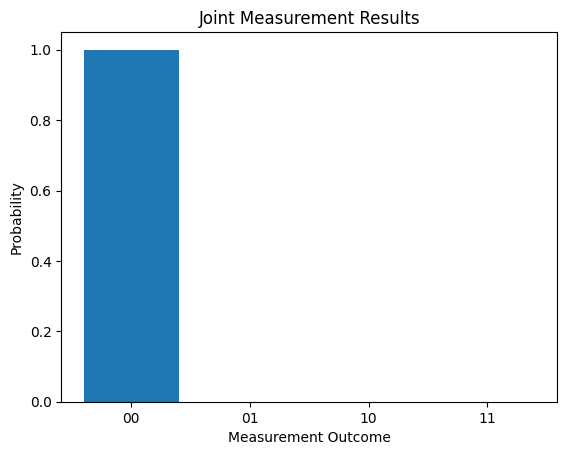

In [ ]:
import pennylane as qml
from pennylane import numpy as np
import matplotlib.pyplot as plt

# Define the quantum circuit for state preparation (ρ)
def prepare_state_circuit():
    dev = qml.device('default.qubit', wires=1)

    @qml.qnode(dev)
    def circuit_rho():
        qml.Hadamard(wires=0)  # Apply Hadamard gate to prepare a superposition state
        return qml.state()

    return circuit_rho

# Function to conjugate the state preparation operation
def conjugate_state(state_prep):
    @qml.qnode(state_prep.device)
    def circuit_rho_bar():
        state_prep()
        qml.adjoint(state_prep)  # Apply the adjoint (inverse) of the state preparation circuit
        return qml.state()

    return circuit_rho_bar

# Function to perform joint measurement on ρ ⊗ ρ*
def joint_measurement(qc_rho, qc_rho_bar):
    dev = qml.device('default.qubit', wires=2)

    @qml.qnode(dev)
    def joint_measurement_circuit():
        qc_rho()  # Evaluate the circuit for state ρ
        qc_rho_bar()  # Evaluate the conjugate circuit for state ρ*
        return qml.probs(wires=[0, 1])  # Perform joint measurement

    return joint_measurement_circuit

# Function to perform Two-Way Quantum Communication (2WQC)
def _2WQC():
    # Alice prepares the state ρ
    circuit_rho = prepare_state_circuit()

    # Bob conjugates the state preparation to prepare ρ*
    circuit_rho_bar = conjugate_state(circuit_rho)

    # Alice and Bob perform joint measurement on ρ ⊗ ρ*
    joint_measurement_circuit = joint_measurement(circuit_rho, circuit_rho_bar)

    # Simulate the joint measurement
    result = joint_measurement_circuit()

    # Plotting the histogram of the measurement results
    fig, ax = plt.subplots()
    ax.bar(range(len(result)), result, align='center')
    ax.set_xticks(range(len(result)))
    ax.set_xticklabels(['00', '01', '10', '11'])  # Labels for the measurement outcomes
    ax.set_xlabel('Measurement Outcome')
    ax.set_ylabel('Probability')
    ax.set_title('Joint Measurement Results')
    plt.show()

# Example usage:
if __name__ == '__main__':
    _2WQC()


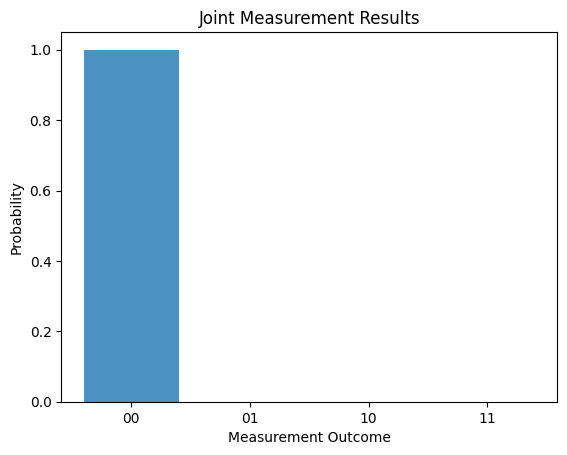

Joint measurement results: [1. 0. 0. 0.]


In [ ]:
import pennylane as qml
from pennylane import numpy as np
import matplotlib.pyplot as plt

# Define the quantum circuit for state preparation (ρ)
def prepare_state_circuit():
    dev = qml.device('default.qubit', wires=1)

    @qml.qnode(dev)
    def circuit_rho():
        qml.Hadamard(wires=0)  # Apply Hadamard gate to prepare a superposition state
        return qml.state()

    return circuit_rho

# Function to conjugate the state preparation operation
def conjugate_state(state_prep):
    @qml.qnode(state_prep.device)
    def circuit_rho_bar():
        state_prep()
        qml.adjoint(state_prep)  # Apply the adjoint (inverse) of the state preparation circuit
        return qml.state()

    return circuit_rho_bar

# Function to perform joint measurement on ρ ⊗ ρ*
def joint_measurement(qc_rho, qc_rho_bar):
    dev = qml.device('default.qubit', wires=2)

    @qml.qnode(dev)
    def joint_measurement_circuit():
        qc_rho()  # Evaluate the circuit for state ρ
        qc_rho_bar()  # Evaluate the conjugate circuit for state ρ*
        return qml.probs(wires=[0, 1])  # Perform joint measurement

    return joint_measurement_circuit

# Function to perform Two-Way Quantum Communication (2WQC)
def _2WQC(plot_histogram=True):
    # Alice prepares the state ρ
    circuit_rho = prepare_state_circuit()

    # Bob conjugates the state preparation to prepare ρ*
    circuit_rho_bar = conjugate_state(circuit_rho)

    # Alice and Bob perform joint measurement on ρ ⊗ ρ*
    joint_measurement_circuit = joint_measurement(circuit_rho, circuit_rho_bar)

    # Simulate the joint measurement
    result = joint_measurement_circuit()

    # Plot histogram of measurement outcomes
    if plot_histogram:
        plt.bar(range(len(result)), result, align='center', alpha=0.8)
        plt.xticks(range(len(result)), ['00', '01', '10', '11'])
        plt.xlabel('Measurement Outcome')
        plt.ylabel('Probability')
        plt.title('Joint Measurement Results')
        plt.show()

    print("Joint measurement results:", result)

# Example usage:
if __name__ == '__main__':
    _2WQC()


In [ ]:
import pennylane as qml
from pennylane import numpy as np
import plotly.graph_objects as go

# Define the quantum circuit for state preparation (ρ)
def prepare_state_circuit():
    dev = qml.device('default.qubit', wires=1)

    @qml.qnode(dev)
    def circuit_rho():
        qml.Hadamard(wires=0)  # Apply Hadamard gate to prepare a superposition state
        return qml.state()

    return circuit_rho

# Function to conjugate the state preparation operation
def conjugate_state(state_prep):
    @qml.qnode(state_prep.device)
    def circuit_rho_bar():
        state_prep()
        qml.adjoint(state_prep)  # Apply the adjoint (inverse) of the state preparation circuit
        return qml.state()

    return circuit_rho_bar

# Function to perform joint measurement on ρ ⊗ ρ*
def joint_measurement(qc_rho, qc_rho_bar):
    dev = qml.device('default.qubit', wires=2)

    @qml.qnode(dev)
    def joint_measurement_circuit():
        qc_rho()  # Evaluate the circuit for state ρ
        qc_rho_bar()  # Evaluate the conjugate circuit for state ρ*
        return qml.probs(wires=[0, 1])  # Perform joint measurement

    return joint_measurement_circuit

# Function to perform Two-Way Quantum Communication (2WQC)
def _2WQC():
    # Alice prepares the state ρ
    circuit_rho = prepare_state_circuit()

    # Bob conjugates the state preparation to prepare ρ*
    circuit_rho_bar = conjugate_state(circuit_rho)

    # Alice and Bob perform joint measurement on ρ ⊗ ρ*
    joint_measurement_circuit = joint_measurement(circuit_rho, circuit_rho_bar)

    # Simulate the joint measurement
    result = joint_measurement_circuit()

    # Create a Plotly figure for the histogram
    fig = go.Figure(data=[
        go.Bar(x=['00', '01', '10', '11'], y=result)
    ])

    # Update layout for better visualization
    fig.update_layout(
        title='Joint Measurement Results',
        xaxis=dict(title='Measurement Outcome'),
        yaxis=dict(title='Probability')
    )

    # Show the Plotly figure
    fig.show()

    print("Joint measurement results:", result)

# Example usage:
if __name__ == '__main__':
    _2WQC()


Joint measurement results: [1. 0. 0. 0.]
